In [35]:
# 1. Imports e leitura dos dados de treino
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# 2. Função de limpeza

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)           # Remove URLs
    text = re.sub(r"[^a-z\s]", "", text)          # Remove pontuação e números
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text


In [37]:
# 3. Carregar dados de treino
train_df = pd.read_csv("../data/train_preprocessed.csv")
train_df['clean_comment'] = train_df['comment_text'].apply(clean_text)

In [38]:
# 4. Vetorizador e vetores
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(train_df['clean_comment'])
y = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

In [39]:
# 5. Split train/test e treino do modelo
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=42)

model = MultiOutputClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)


MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000))

In [40]:
# 6. Avaliação
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']))


               precision    recall  f1-score   support

        toxic       0.90      0.65      0.75       748
 severe_toxic       0.54      0.31      0.40        80
      obscene       0.91      0.71      0.80       421
       threat       0.75      0.23      0.35        13
       insult       0.86      0.55      0.67       410
identity_hate       0.83      0.21      0.34        71

    micro avg       0.88      0.61      0.72      1743
    macro avg       0.80      0.44      0.55      1743
 weighted avg       0.87      0.61      0.71      1743
  samples avg       0.06      0.05      0.05      1743



c:\Users\matra\anaconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matra\anaconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matra\anaconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
# 7. Previsão com base de teste
# Carregar base de teste (sem labels)
test_df = pd.read_csv("../data/test_preprocessed.csv")
test_df['comment_text'] = test_df['comment_text'].fillna("")  # Corrige o erro
test_df['clean_comment'] = test_df['comment_text'].apply(clean_text)

In [42]:
# Transformar com mesmo vetorizador
X_test_final = vectorizer.transform(test_df['clean_comment'])

In [43]:
# Prever
y_test_pred = model.predict(X_test_final)
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
pred_df = pd.DataFrame(y_test_pred, columns=labels)

In [44]:
# Concatenar com o dataframe original (opcional)
final_output = pd.concat([test_df[['id', 'comment_text']], pred_df], axis=1)
final_output.to_csv("../data/test_predictions.csv", index=False)
print("Previsões salvas em '../data/test_predictions.csv'")

Previsões salvas em '../data/test_predictions.csv'


In [45]:
# Verificar valores únicos de cada coluna
print(classification_report(y_val, y_pred, target_names=labels))

               precision    recall  f1-score   support

        toxic       0.90      0.65      0.75       748
 severe_toxic       0.54      0.31      0.40        80
      obscene       0.91      0.71      0.80       421
       threat       0.75      0.23      0.35        13
       insult       0.86      0.55      0.67       410
identity_hate       0.83      0.21      0.34        71

    micro avg       0.88      0.61      0.72      1743
    macro avg       0.80      0.44      0.55      1743
 weighted avg       0.87      0.61      0.71      1743
  samples avg       0.06      0.05      0.05      1743



c:\Users\matra\anaconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matra\anaconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matra\anaconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
sample = final_output.sample(5)  # 10 exemplos aleatórios
for _, row in sample.iterrows():
    print("Comentário:", row["comment_text"])
    print("Previsão:")
    for label in labels:
        if row[label] == 1:
            print(f"  - {label}")
    print("-" * 50)


Comentário:  as discussed earlier  i m continuing to remove references to selfpub site from wp  your insistence on ascribing very dark motives to editing from two different computers  clearly identified at your first request as being done by the same person  as in http en wikipedia org w index php title user talk diff  prev oldid is noted  it is not appreciated  naturally 
Previsão:
--------------------------------------------------
Comentário: oh good since that definition clearly excludes actions taken by regular soldiers  so that definition excludes terror bombing 
Previsão:
--------------------------------------------------
Comentário:  well i feel stupid enough now  kind of like when someone says surprise and the person punches them only to find out they were throwing them a surprise party  i did have a witty retort ready though  the only thing shocking about that edit was that i used an emoticon  
Previsão:
--------------------------------------------------
Comentário:  scrivener

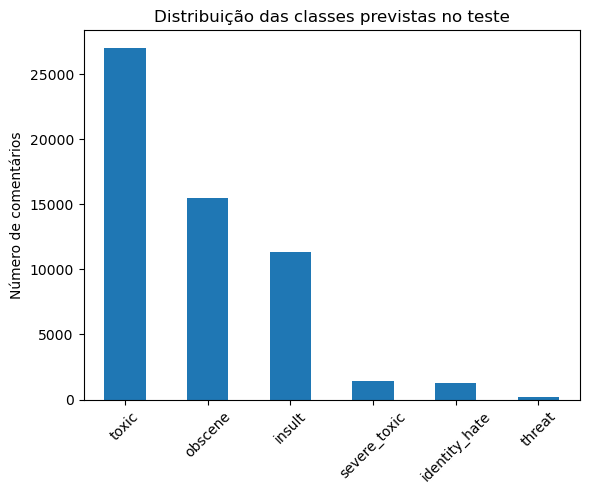

In [47]:
pred_df[labels].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Distribuição das classes previstas no teste")
plt.ylabel("Número de comentários")
plt.xticks(rotation=45)
plt.show()

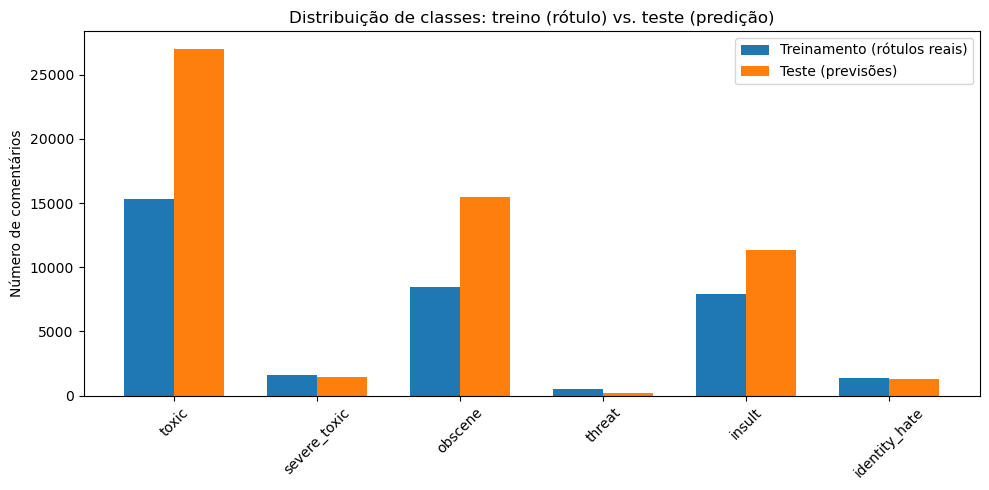

In [48]:
# Labels usados
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Contagem de rótulos reais no treino
train_counts = train_df[labels].sum()

# Contagem de rótulos previstos no teste
test_counts = pred_df[labels].sum()

# Configuração do gráfico
x = np.arange(len(labels))  # posições no eixo x
width = 0.35  # largura das barras

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, train_counts, width, label='Treinamento (rótulos reais)')
bars2 = ax.bar(x + width/2, test_counts, width, label='Teste (previsões)')

# Ajustes do gráfico
ax.set_ylabel('Número de comentários')
ax.set_title('Distribuição de classes: treino (rótulo) vs. teste (predição)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()